In [ ]:
import nibabel as nib
from nilearn.plotting import plot_prob_atlas, plot_stat_map
from nilearn.image import iter_img
from nilearn.decomposition import CanICA

In [ ]:
# Load the functional image
data_img = nib.load("../data/preprocessed/sub-control01/func/coregistered_fmri_to_mni.nii.gz")

In [42]:
# RUN ICA
n_components = 3
ica = CanICA(n_components=n_components)
ica.fit(data_img)

CanICA(n_components=3)

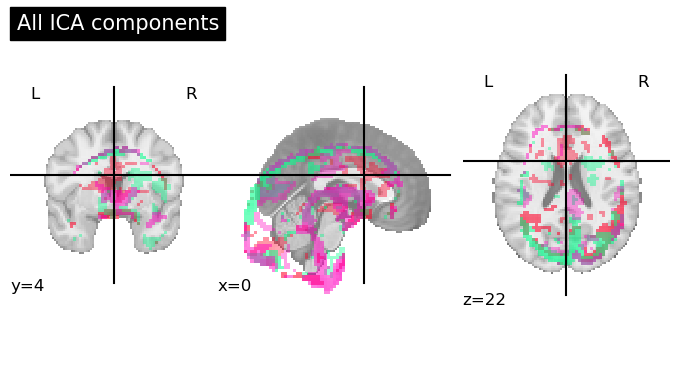

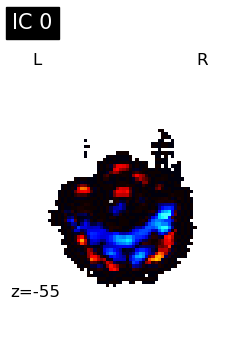

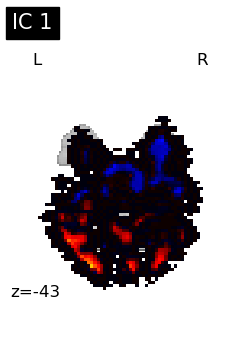

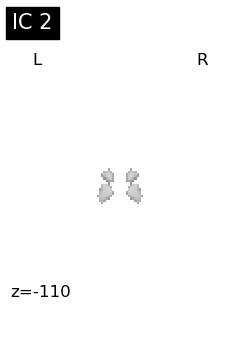

In [43]:
# Retrieve the independent components in brain space
components_img = ica.components_img_
# Plot all ICA components together
plot_prob_atlas(components_img, title='All ICA components')

for i, cur_img in enumerate(iter_img(components_img)):
    plot_stat_map(
        cur_img,
        display_mode="z",
        title=f"IC {int(i)}",
        cut_coords=1,
        colorbar=False,
    )